In [88]:
## Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

%matplotlib  inline
%reload_ext autoreload
%autoreload 2

In [89]:
## Setting the seaborn context and style
sns.set_context(context = 'paper', font_scale = 1.4)
sns.set_style(style = 'ticks')

In [90]:
## Loading in dataset
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [91]:
## Checking the number of rows and columns in dataset
anscombe.shape ## (44, 3)

(44, 3)

In [92]:
## Features/columns present in the dataset
# anscombe.columns

print(f'There are {len(anscombe.columns)} columns in the "anscombe" dataset and the columns present are as follows: \n {np.array(anscombe.columns)}')

There are 3 columns in the "anscombe" dataset and the columns present are as follows: 
 ['dataset' 'x' 'y']


In [93]:
##  Checking for null values in our 'anscombe' data set
anscombe.isnull().sum() ## We have no missing values in our dataset

dataset    0
x          0
y          0
dtype: int64

In [94]:
## Checking the 'anscombe' dataframe datatypes - which also includes the number of non-null values and the number of 
## columns once again
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [95]:
## Performing some descriptive statistics on our 'anscombe' dataframe
anscombe.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dataset,44,4,I,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,44.0,NaN,NaN,NaN,9.0,3.198837,4.0,7.0,8.0,11.0,19.0
y,44.0,NaN,NaN,NaN,7.500682,1.958925,3.1,6.1175,7.52,8.7475,12.74


Based on the description of the above data, we have that for the 'x' feature, that it is positively skewed as its mean is greater than the median.

Likewise, the 'y' feature is also positively skewed as its mean is greater than its median. This also mean that the greater values in the dataset are essentially 'pulling' the mean to the right side.

In [96]:
## To verify that both features are positively skewed, we have:

skew_x = anscombe['x'].skew()
skew_y = anscombe['y'].skew()

print('The skewness of "x" is:\t', skew_x)
print('The skewness of "y" is:\t', skew_y)

The skewness of "x" is:	 0.7368749513164028
The skewness of "y" is:	 0.4393457530995765


As confirmed, both the 'x' & 'y' values are positively skewed, as both their respective values as are greater than 0. 'y' has its skewness almost equal to that of a normal/gaussian distribution, which is 0. 

I find it very handy to determine the central measures of tendency for the numerical features in a dataset to give me a sense of the shape of its distribution (which will be further confirmed in data visualization)

Now we also look at the taildness (kurtosis) of both the 'x' & 'y' features

In [97]:
kurt_x = anscombe['x'].kurt()
kurt_y = anscombe['y'].kurt()

print('The kurtosis of "x" is given by:\t', kurt_x)
print('The kurtosis of "y" is given by:\t', kurt_y)

The kurtosis of "x" is given by:	 0.8352787456445996
The kurtosis of "y" is given by:	 0.9086017656425889


The values of the kurtosis for both the 'x' & 'y' show that they are both leptokurtic, i.e. have excess kurtosis greater than 0 and this means that both features have extreme values, and many of these values are centred around the mean.

Likewise, this also mean that in terms of the shape of their distributions, they have a much more sharp and central peak with fatter or heavier tails. As before, data visualization should confirm this as seen below.

<Axes: xlabel='x', ylabel='Count'>

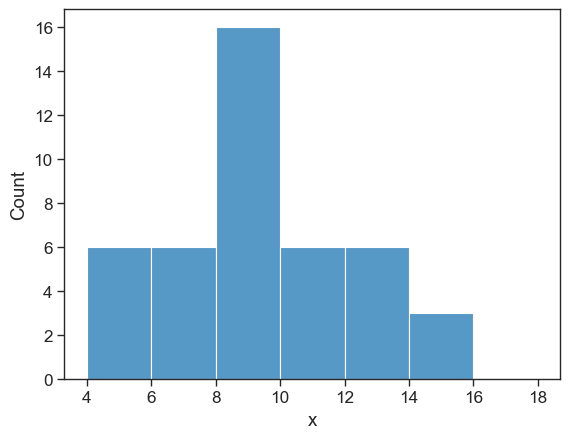

In [98]:
## Given that we have no missing values, we can now perform some data visualization
## Performing univariate analysis on 'x' first
bins = np.arange(4, 19, 2)
sns.histplot(data = anscombe, x = 'x', bins = bins)

It can be seen that many of the values for 'x' fall in between the values 8-12.

<Axes: xlabel='x', ylabel='Density'>

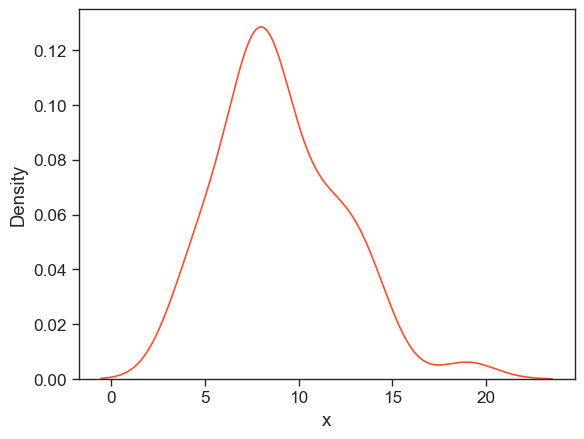

In [99]:
sns.kdeplot(data = anscombe, x = 'x', color = '#fc4f30')

The visualization for 'x' shows that it lines up with our descriptive statistics and the central moments of the kurtosis & skewness. Most of the values are centered around the mean of 'x' (which is 9), and this is confirmed by the fact that the feature, 'x' is leptokurtic.

<Axes: xlabel='y', ylabel='Count'>

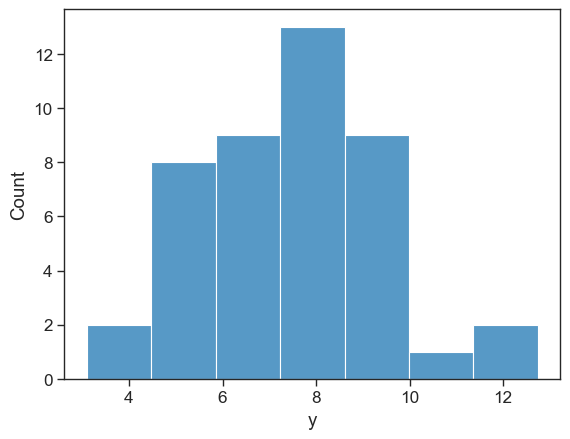

In [100]:
## Moving on to the 'y' feature

sns.histplot(data = anscombe, x = 'y')

<Axes: xlabel='y', ylabel='Density'>

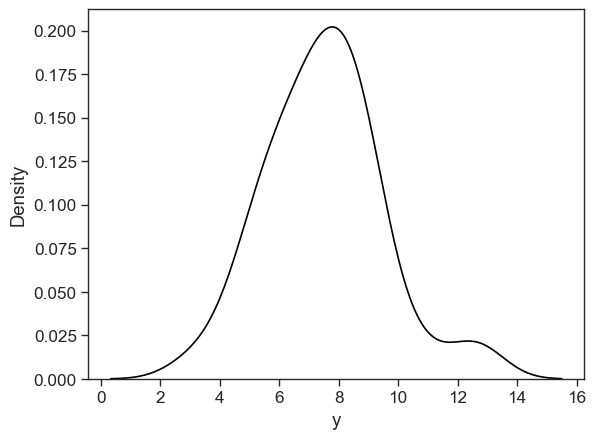

In [101]:
sns.kdeplot(data = anscombe, x = 'y', color = 'k')

Likewise, this visualization tallies with the fact that majority of the values are cetered around the mean of ~7.5. Given that the distribution is postively skewed, it also shows how many of the values are near the minimum range of the distribution.	

<Axes: >

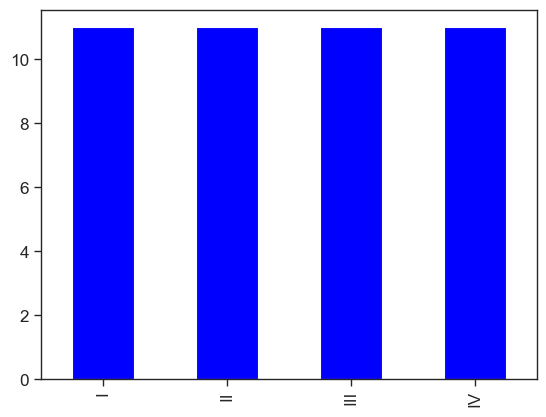

In [102]:
## Analysis of 'dataset' feature
anscombe['dataset'].value_counts()\
.plot(color = 'b', kind = 'bar')

For the categrical feature 'dataset', we have a uniform distribution of each feature having 11 counts.

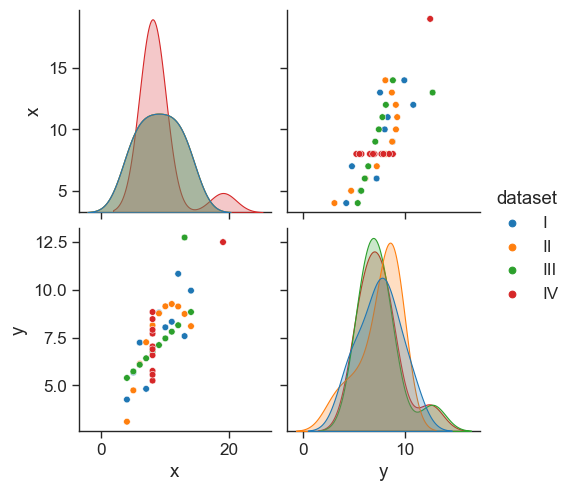

In [103]:
## Bivariate Analysis
sns.pairplot(data = anscombe, vars = ['x', 'y'], hue = 'dataset')

<Axes: xlabel='x', ylabel='y'>

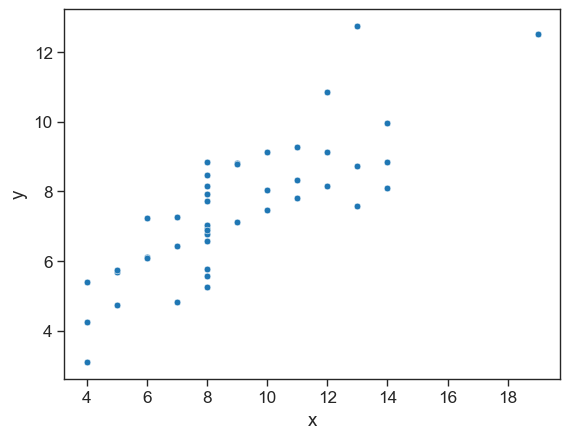

In [104]:
sns.scatterplot(data = anscombe, x = 'x', y = 'y')

In [105]:
## Possible outlier
anscombe.query('x > 18 & y > 12')

,dataset,x,y
40,IV,19.0,12.5


We have possible outliers here, so we could consider dropping them.

In [106]:
## Multivariate Analysis
ans_corr = anscombe.corr(numeric_only = True)
ans_corr

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


From the above results, we can confirm that both features 'x' & 'y' have a strong positive Pearson's correlation, which means that as 'x' increases, 'y' also increases. 

Given that this is so, keeping the values of (19.0, 12.5) for both 'x' & 'y' respectively would not hurt in a machine learning model.

<Axes: >

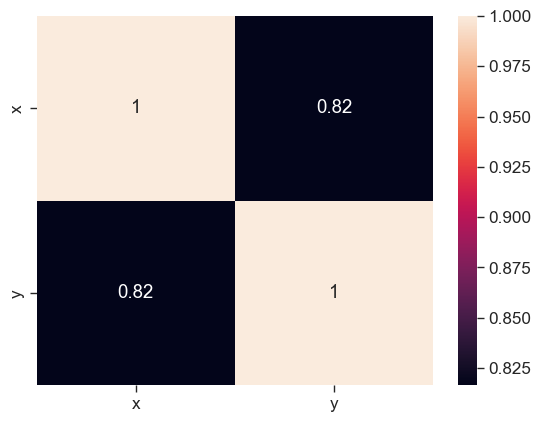

In [107]:
## Creating a heatmap
sns.heatmap(ans_corr, annot = True)

In [108]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [109]:
## Feature Preprocessing
OneHotEnc = OneHotEncoder()
OneHotEnc


OneHotEncoder()

In [110]:
## Fitting to dataset 'anscombe'
dataset = anscombe.dataset
dataset = dataset[:, np.newaxis]
OneHotEnc.fit(dataset)

C:\Users\kofia\AppData\Local\Temp\ipykernel_7188\729240517.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset = dataset[:, np.newaxis]


OneHotEncoder()

In [111]:
## Feature labels
feature_labs = OneHotEnc.categories_
feature_labs = np.array(feature_labs).ravel()
print(feature_labs)

['I' 'II' 'III' 'IV']


In [112]:
## Sanity Check: Number of fetaure fitted using OneHotEncoder
OneHotEnc.n_features_in_ ## Just the 'dataset' column


1

In [113]:
## Transforming 'dataset' column
feature_array = OneHotEnc.transform(dataset).toarray()
feature_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],


In [114]:
## Creating new dataframe for 'feature_array'
new_df = pd.DataFrame(feature_array, columns = feature_labs)
new_df

,I,II,III,IV
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [115]:
## Further preprocessing of 'x' & 'y' variables using 'StandardScaler'
stand_scale = StandardScaler()
stand_scale

xy = anscombe.loc[:, ['x', 'y']]

# xy_scale = xy_scale[:, np.newaxis]
xy

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [116]:
type(xy)

pandas.core.frame.DataFrame

In [117]:
# xy_scale.mean_
xy_scale = stand_scale.fit(xy)
xy_scale

StandardScaler()

In [118]:
## Feature names being transformed
feat_names = np.array(stand_scale.feature_names_in_).ravel()
print(feat_names)

['x' 'y']


In [119]:
xy_scaled = xy_scale.transform(xy)
xy_scaled

array([[ 0.31622777,  0.27849623],
       [-0.31622777, -0.28436425],
       [ 1.26491106,  0.04095878],
       [ 0.        ,  0.67611327],
       [ 0.63245553,  0.4282481 ],
       [ 1.58113883,  1.26995689],
       [-0.9486833 , -0.13461238],
       [-1.58113883, -1.67344195],
       [ 0.9486833 ,  1.72437637],
       [-0.63245553, -1.38426593],
       [-1.26491106, -0.94017417],
       [ 0.31622777,  0.84652057],
       [-0.31622777,  0.33013481],
       [ 1.26491106,  0.63996626],
       [ 0.        ,  0.65545784],
       [ 0.63245553,  0.90848686],
       [ 1.58113883,  0.30947938],
       [-0.9486833 , -0.70780058],
       [-1.58113883, -2.27244944],
       [ 0.9486833 ,  0.84135671],
       [-0.63245553, -0.12428466],
       [-1.26491106, -1.42557679],
       [ 0.31622777, -0.02100751],
       [-0.31622777, -0.37731369],
       [ 1.26491106,  2.70550932],
       [ 0.        , -0.20174253],
       [ 0.63245553,  0.15972751],
       [ 1.58113883,  0.69160484],
       [-0.9486833 ,

In [120]:
xy_df = pd.DataFrame(xy_scaled, columns = feat_names)
xy_df.columns = ['X_scaled', 'Y_scaled']
xy_df

,X_scaled,Y_scaled
0,0.316228,0.278496
1,-0.316228,-0.284364
2,1.264911,0.040959
3,0.000000,0.676113
4,0.632456,0.428248
5,1.581139,1.269957
6,-0.948683,-0.134612
7,-1.581139,-1.673442
8,0.948683,1.724376
9,-0.632456,-1.384266


In [121]:
## Concatinating 'new_df' with the 'anscombe' dataframe
anscombe_new = pd.concat([anscombe, new_df], axis = 'columns')
anscombe_new = anscombe_new.drop('dataset', axis = 1)
anscombe_new

,x,y,I,II,III,IV
0,10.0,8.04,1.0,0.0,0.0,0.0
1,8.0,6.95,1.0,0.0,0.0,0.0
2,13.0,7.58,1.0,0.0,0.0,0.0
3,9.0,8.81,1.0,0.0,0.0,0.0
4,11.0,8.33,1.0,0.0,0.0,0.0
5,14.0,9.96,1.0,0.0,0.0,0.0
6,6.0,7.24,1.0,0.0,0.0,0.0
7,4.0,4.26,1.0,0.0,0.0,0.0
8,12.0,10.84,1.0,0.0,0.0,0.0
9,7.0,4.82,1.0,0.0,0.0,0.0


In [122]:
anscombe_new = pd.concat([anscombe_new, xy_df], axis = 1)
anscombe_new = anscombe_new.drop(['x', 'y'], axis = 1)

In [123]:
anscombe_new

,I,II,III,IV,X_scaled,Y_scaled
0,1.0,0.0,0.0,0.0,0.316228,0.278496
1,1.0,0.0,0.0,0.0,-0.316228,-0.284364
2,1.0,0.0,0.0,0.0,1.264911,0.040959
3,1.0,0.0,0.0,0.0,0.000000,0.676113
4,1.0,0.0,0.0,0.0,0.632456,0.428248
5,1.0,0.0,0.0,0.0,1.581139,1.269957
6,1.0,0.0,0.0,0.0,-0.948683,-0.134612
7,1.0,0.0,0.0,0.0,-1.581139,-1.673442
8,1.0,0.0,0.0,0.0,0.948683,1.724376
9,1.0,0.0,0.0,0.0,-0.632456,-1.384266
